# Modellbildung und Simulation - Übung 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
accData = pd.read_csv("data/Acceleration.csv", sep=";")
pvData = pd.read_csv("data/Pressure_and_velocity.csv", sep=";")

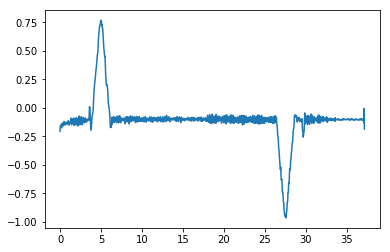

In [4]:
plt.plot(accData['Time (s)'], accData['Acceleration (m/s²)'])

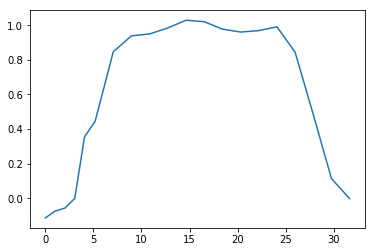

In [5]:
plt.plot(pvData['Time (s)'], pvData['Velocity (m/s)'])

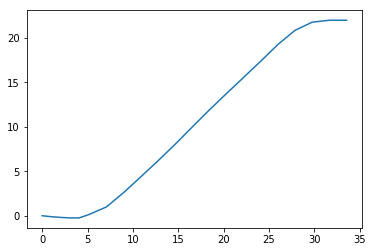

In [6]:
plt.plot(pvData['Time (s)'], pvData['Height (m)'])

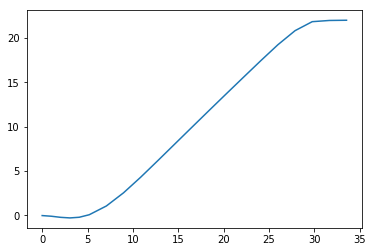

In [47]:
coefs = poly.polyfit(pvData['Time (s)'], pvData['Height (m)'], 10)
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(pvData['Time (s)'], ffit(pvData['Time (s)']))

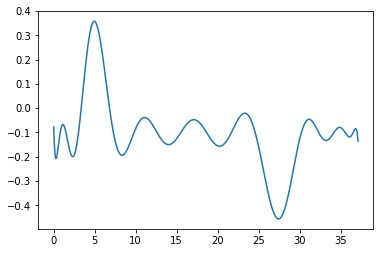

In [38]:
coefs = poly.polyfit(accData['Time (s)'], accData['Acceleration (m/s²)'], 17)
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(accData['Time (s)'], ffit(accData['Time (s)']))

## Aufgabe 1 C - Federkonstanten

In [2]:
SpringData = pd.read_csv("data/DatenFeder.txt", sep=" ")

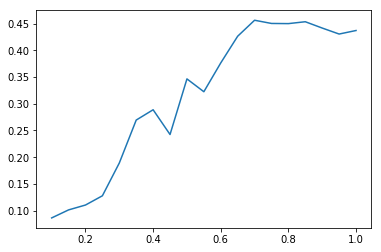

In [57]:
plt.plot(SpringData['Mass(kg)'], SpringData['Distance(m)'])

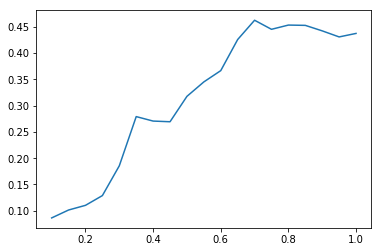

In [13]:
coefs = poly.polyfit(SpringData['Mass(kg)'], SpringData['Distance(m)'], 15)
ffit = poly.Polynomial(coefs)    # instead of np.poly1d
plt.plot(SpringData['Mass(kg)'], ffit(SpringData['Mass(kg)']))

In [60]:
SpringConst = 0;
for i in range(0,19):
    Force = SpringData['Mass(kg)'][i] * 9.80665
    SpringConst = SpringConst + (Force / SpringData['Distance(m)'][i])
    #print((Kraft / FederData['Distance(m)'][i]))
SpringConst = SpringConst / 18
print('Die gemittelte Federkonstante aus linearer Funktion ist: ' + str(SpringConst))

Die gemittelte Federkonstante aus linearer Funktion ist: 17.52992822622751


In [12]:
D = poly.polyfit(SpringData['Distance(m)'][0:19],SpringData['Mass(kg)'][0:19] * 9.80665,3);
D   #????

array([ -0.48227382,  25.28945829, -56.61591371,  96.29927373])

## Aufgabe 1 D - Wurfbewegung

In [15]:
ThrowData = pd.read_csv("data/DatenSchWurf.txt", sep=" ")
ThrowData

,Distance(yds),height(ins),height,height.1,height.2
0,30,0.00,0.00,0.00,0.00
1,29,2.25,3.25,4.50,6.50
2,28,5.25,6.50,6.50,8.75
3,27,7.50,7.75,8.25,9.25
4,26,8.75,9.25,9.50,10.50
5,25,12.00,12.25,12.50,14.75
6,24,13.75,16.00,16.00,16.50
7,23,14.75,15.25,15.50,17.50
8,22,15.50,16.00,16.60,16.75
9,21,17.00,17.00,17.50,19.25


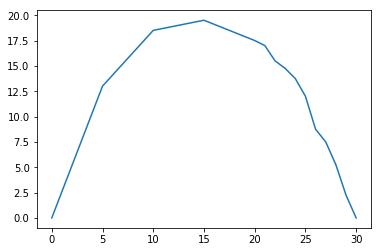

In [16]:
plt.plot(ThrowData['Distance(yds)'], ThrowData['height(ins)'])

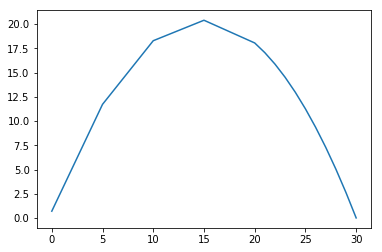

In [26]:
coeffs = poly.polyfit(ThrowData['Distance(yds)'],ThrowData['height(ins)'],2);
ffit = poly.Polynomial(coeffs)    # instead of np.poly1d
plt.plot(ThrowData['Distance(yds)'], ffit(ThrowData['Distance(yds)']))

In [83]:
#Dauer des Flugs: Freier Fall aus 20m Höhe Formel s = 1/2 g * t^2 
g = 9.81;
s = max(ThrowData['height(ins)']);
t=(s*2/g)**0.5
t = t * 2 #Ball fliegt in etwa in der gleichen Geschwindigkeit nach oben wie er wieder fällt
print('Die Flugzeit beträgt ca. ' + str(t) + ' Sekunden')


Die Flugzeit beträgt ca. 3.9877488226796425 Sekunden


In [38]:
#Geschwindigkeit in horzontaler Richtung
vHoriz = max(ThrowData['Distance(yds)']) / t
print('Die Horizontale Geschwindigkeit beträgt: ' + str(vHoriz) + ' m/s')

Die Horizontale Geschwindigkeit beträgt: 7.5230415289398636m/s


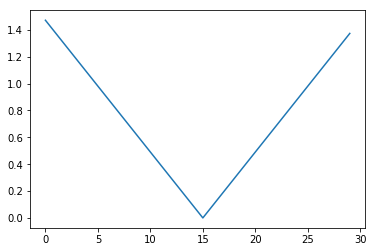

In [82]:
#Geschwindigkeit in vertikaler Richtung: v = g * t
g = 9.81
vVert = []
vVertDown = []
vVertUp = []
for time in range(0,16):
    vVertDown.append((g * time)/100)
vVertUp = vVertDown[::-1]
vVertDown.pop()
vVertDown
vVertUp.pop()
vVert = vVertUp + vVertDown

plt.plot(range(0,30), vVert)

